In [1]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from HONG import *
import HONG
importlib.reload(HONG)
import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl

mpl.style.use('report_style.mplstyle')

In [2]:
prop_committed = 0.03
betas = np.linspace(0, 1, 50)
ensemble_size = 10
run_length = 10**5
social_structures = ['InVS15', 'LyonSchool', 'SFHH', 'Thiers13']

In [3]:
for social_structure in social_structures[:]:
    for beta in betas:
        run_ensemble_experiment(prop_committed, beta, beta, ensemble_size, run_length, social_structure)

100%|██████████| 10/10 [00:44<00:00,  4.43s/it]


# Plotting

loaded data: 0.0
loaded data: 0.02040816326530612
loaded data: 0.04081632653061224
loaded data: 0.061224489795918366
loaded data: 0.08163265306122448
loaded data: 0.1020408163265306
loaded data: 0.12244897959183673
loaded data: 0.14285714285714285
loaded data: 0.16326530612244897
loaded data: 0.18367346938775508
loaded data: 0.2040816326530612
loaded data: 0.22448979591836732
loaded data: 0.24489795918367346
loaded data: 0.26530612244897955
loaded data: 0.2857142857142857
loaded data: 0.3061224489795918
loaded data: 0.32653061224489793
loaded data: 0.3469387755102041
loaded data: 0.36734693877551017
loaded data: 0.3877551020408163
loaded data: 0.4081632653061224
loaded data: 0.42857142857142855
loaded data: 0.44897959183673464
loaded data: 0.4693877551020408
loaded data: 0.4897959183673469
loaded data: 0.5102040816326531
loaded data: 0.5306122448979591
loaded data: 0.5510204081632653
loaded data: 0.5714285714285714
loaded data: 0.5918367346938775
loaded data: 0.6122448979591836
loaded 

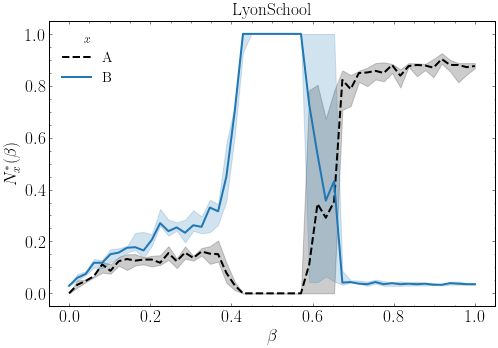

In [6]:
social_structure = 'LyonSchool'

Astar_list = []
Astar25_list = []
Astar75_list = []
Bstar_list = []
Bstar25_list = []
Bstar75_list = []

for beta in betas:
    fname = f'{social_structure}_{prop_committed}_{beta}_{beta}_{run_length}_{ensemble_size}'

    data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

    print(f'loaded data: {beta}')

    A_data = data[0::3,:]
    B_data = data[1::3,:]
    AB_data = data[2::3,:]

    N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

    A_data = A_data/N
    B_data = B_data/N
    AB_data = AB_data/N

    Astar_list.append(np.median(A_data[:, -1]))
    Astar25_list.append(np.percentile(A_data[:, -1], 25))
    Astar75_list.append(np.percentile(A_data[:, -1], 75))

    Bstar_list.append(np.median(B_data[:, -1]))
    Bstar25_list.append(np.percentile(B_data[:, -1], 25))
    Bstar75_list.append(np.percentile(B_data[:, -1], 75))

plt.figure(1)
plt.plot(betas, Astar_list, color='k', linestyle='--', label='A')
plt.fill_between(betas, Astar25_list, Astar75_list, color='k', alpha=0.2)

plt.plot(betas, Bstar_list, color='tab:blue', label='B')
plt.fill_between(betas, Bstar25_list, Bstar75_list, color='tab:blue', alpha=0.2)

plt.legend(title=r'$x$')
plt.title(f'{social_structure}')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$N^{\ast}_{x}(\beta)$')
plt.savefig(f'figures/fig3b_{social_structure}_{prop_committed}_{run_length}_{ensemble_size}.pdf')
plt.show()


